In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as mat
import random 

sns.set()


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#create a folder hack and upload the csv to your google drive
#click the mount drive button in left of this window (in the storage section)
#then click run
#it is better to create a copy of this notebook and do
datam=pd.read_csv("/content/drive/My Drive/hack/Copy of TrainingData - Training.csv")
(datam.head())

,Period,EQ,Social_Search_Impressions,Social_Search_Working_cost,Digital_Impressions,Digital_Working_cost,Print_Impressions.Ads40,Print_Working_Cost.Ads50,OOH_Impressions,OOH_Working_Cost,SOS_pct,Digital_Impressions_pct,CCFOT,Median_Temp,Median_Rainfall,Fuel_Price,Inflation,Trade_Invest,Brand_Equity,Avg_EQ_Price,Any_Promo_pct_ACV,Any_Feat_pct_ACV,Any_Disp_pct_ACV,EQ_Base_Price,Est_ACV_Selling,pct_ACV,Avg_no_of_Items,pct_PromoMarketDollars_Category,RPI_Category,Magazine_Impressions_pct,TV_GRP,Competitor1_RPI,Competitor2_RPI,Competitor3_RPI,Competitor4_RPI,EQ_Category,EQ_Subcategory,pct_PromoMarketDollars_Subcategory,RPI_Subcategory
0,2016 - Period:1,504.784933,NaN,NaN,37148.2,2045.282,NaN,NaN,NaN,NaN,7.446883,NaN,100.0,32.950,0.5150,8.226,0.013258,42744.25684,42.410000,49.091447,9.691794,NaN,1.688896,1.427532,8696587915,39.441025,2.611782,0.0339,35.817030,NaN,NaN,97.173365,35.557371,44.502717,63.377268,1728388.673,331927.5394,0.162732,40.560563
1,2016 - Period:2,490.226477,NaN,NaN,50886.8,2370.584,0.000014,0.000015,NaN,NaN,11.677082,NaN,87.5,34.625,0.2700,7.473,0.009938,36290.43956,42.410000,49.057612,9.415938,NaN,1.687952,1.442716,8682307085,38.417224,2.522814,0.0391,36.389065,NaN,NaN,97.850760,37.223072,45.720077,62.731742,1900859.879,334611.3806,0.231650,40.046301
2,2016 - Period:3,479.244686,NaN,NaN,253333.2,3180.888,0.000016,0.000017,NaN,NaN,0.102858,NaN,96.0,46.700,0.3900,8.001,0.007832,34852.14166,42.410000,49.367514,5.176684,NaN,NaN,1.423408,8706897549,36.499442,2.477322,0.0228,36.599984,NaN,NaN,96.397739,40.800563,41.822953,62.090417,2036436.906,387148.3582,0.125394,40.411115
3,2016 - Period:4,489.057428,NaN,NaN,3426239.0,13595.398,0.000016,0.000019,NaN,NaN,0.249055,NaN,100.0,49.650,0.3500,8.767,0.010034,24869.55899,43.543571,50.657634,6.088273,NaN,NaN,1.443401,8660288592,38.135159,2.520409,0.0147,38.201852,NaN,NaN,98.936519,36.576140,41.578429,63.374358,2113635.013,482489.6740,0.056603,42.213246
4,2016 - Period:5,477.031994,NaN,NaN,552197.8,3983.134,0.000016,0.000019,NaN,NaN,13.338804,NaN,100.0,58.100,0.5025,9.277,0.009546,61675.32162,43.790000,50.625777,7.827112,NaN,0.170731,1.473687,8644518558,38.629564,2.497285,0.0219,38.648805,31.702433,25.3,100.509969,36.032016,42.602412,63.291934,2402211.102,629826.6484,0.065059,43.345578


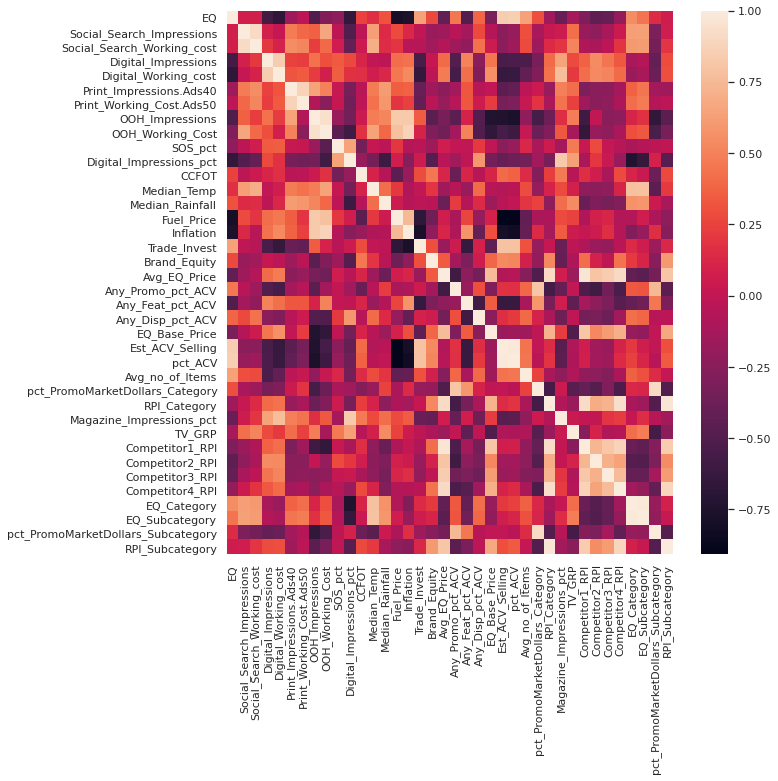

In [4]:
mat.figure(figsize=(10,10))
corre=datam.corr()
#corre=corre.abs()
ax = sns.heatmap(corre,xticklabels=True, yticklabels=True)

In [5]:
datam.isnull().any()


Period                                False
EQ                                    False
Social_Search_Impressions              True
Social_Search_Working_cost             True
Digital_Impressions                    True
Digital_Working_cost                   True
Print_Impressions.Ads40                True
Print_Working_Cost.Ads50               True
OOH_Impressions                        True
OOH_Working_Cost                       True
SOS_pct                               False
Digital_Impressions_pct                True
CCFOT                                 False
Median_Temp                           False
Median_Rainfall                       False
Fuel_Price                            False
Inflation                             False
Trade_Invest                          False
Brand_Equity                          False
Avg_EQ_Price                          False
Any_Promo_pct_ACV                     False
Any_Feat_pct_ACV                       True
Any_Disp_pct_ACV                

In [6]:
def removenull(dataq):
  for col in dataq:
    if(col!="Period"):
      num_of_rows=dataq['Period'].count()
      for i in range(0,num_of_rows-2):
        if(pd.isna(dataq.iloc[i][col])):
          f_found=i
          first=i-1
          countna=0
          for j in range(f_found,num_of_rows):
            countna=countna+1
            if(not pd.isna(dataq.iloc[j][col])):
              l_found=j
              print(dataq[col][f_found],dataq[col][l_found])
              dataq[col][f_found:l_found].fillna((dataq.iloc[first][col]+dataq.iloc[l_found][col])/2,inplace=True)
              break
  return dataq
datam=removenull(datam)
datam.fillna(method='bfill',inplace=True)
datam.fillna(method='ffill',inplace=True)

nan 3919100.6
nan 3919100.6
nan 3919100.6
nan 3919100.6
nan 3919100.6
nan 3919100.6
nan 3919100.6
nan 3919100.6
nan 3919100.6
nan 24839.812
nan 24839.812
nan 24839.812
nan 24839.812
nan 24839.812
nan 24839.812
nan 24839.812
nan 24839.812
nan 24839.812
nan 2262738.0
nan 3006588.2
nan 31259.4159
nan 36791.8245
nan 1.4000000000000001e-05
nan 1.4999999999999999e-05
nan 63009885.0
nan 63009885.0
nan 63009885.0
nan 63009885.0
nan 63009885.0
nan 63009885.0
nan 63009885.0
nan 63009885.0
nan 63009885.0
nan 63009885.0
nan 63009885.0
nan 63009885.0
nan 63009885.0
nan 63009885.0
nan 63009885.0
nan 63009885.0
nan 1876621874.0
nan 300082.9333
nan 300082.9333
nan 300082.9333
nan 300082.9333
nan 300082.9333
nan 300082.9333
nan 300082.9333
nan 300082.9333
nan 300082.9333
nan 300082.9333
nan 300082.9333
nan 300082.9333
nan 300082.9333
nan 300082.9333
nan 300082.9333
nan 300082.9333
nan 5224427.6
nan 3.828396226
nan 3.828396226
nan 3.828396226
nan 3.828396226
nan 3.828396226
nan 3.828396226
nan 3.8283962

,Period,EQ,Social_Search_Impressions,Social_Search_Working_cost,Digital_Impressions,Digital_Working_cost,Print_Impressions.Ads40,Print_Working_Cost.Ads50,OOH_Impressions,OOH_Working_Cost,SOS_pct,Digital_Impressions_pct,CCFOT,Median_Temp,Median_Rainfall,Fuel_Price,Inflation,Trade_Invest,Brand_Equity,Avg_EQ_Price,Any_Promo_pct_ACV,Any_Feat_pct_ACV,Any_Disp_pct_ACV,EQ_Base_Price,Est_ACV_Selling,pct_ACV,Avg_no_of_Items,pct_PromoMarketDollars_Category,RPI_Category,Magazine_Impressions_pct,TV_GRP,Competitor1_RPI,Competitor2_RPI,Competitor3_RPI,Competitor4_RPI,EQ_Category,EQ_Subcategory,pct_PromoMarketDollars_Subcategory,RPI_Subcategory
0,2016 - Period:1,504.784933,3919100.6,24839.81200,37148.2,2045.282000,1.543491e+05,3043.461661,6.300988e+07,3.000829e+05,7.446883,3.828396,100.000000,32.950,0.5150,8.226,0.013258,42744.25684,42.410000,49.091447,9.691794,1.633989,1.688896,1.427532,8696587915,39.441025,2.611782,0.033900,35.817030,31.702433,25.30,97.173365,35.557371,44.502717,63.377268,1728388.673,331927.5394,0.162732,40.560563
1,2016 - Period:2,490.226477,3919100.6,24839.81200,50886.8,2370.584000,1.400000e-05,0.000015,6.300988e+07,3.000829e+05,11.677082,3.828396,87.500000,34.625,0.2700,7.473,0.009938,36290.43956,42.410000,49.057612,9.415938,1.633989,1.687952,1.442716,8682307085,38.417224,2.522814,0.039100,36.389065,31.702433,25.30,97.850760,37.223072,45.720077,62.731742,1900859.879,334611.3806,0.231650,40.046301
2,2016 - Period:3,479.244686,3919100.6,24839.81200,253333.2,3180.888000,1.560000e-05,0.000017,6.300988e+07,3.000829e+05,0.102858,3.828396,96.000000,46.700,0.3900,8.001,0.007832,34852.14166,42.410000,49.367514,5.176684,1.633989,0.929341,1.423408,8706897549,36.499442,2.477322,0.022800,36.599984,31.702433,25.30,96.397739,40.800563,41.822953,62.090417,2036436.906,387148.3582,0.125394,40.411115
3,2016 - Period:4,489.057428,3919100.6,24839.81200,3426239.0,13595.398000,1.624000e-05,0.000019,6.300988e+07,3.000829e+05,0.249055,3.828396,100.000000,49.650,0.3500,8.767,0.010034,24869.55899,43.543571,50.657634,6.088273,1.633989,0.929341,1.443401,8660288592,38.135159,2.520409,0.014700,38.201852,31.702433,25.30,98.936519,36.576140,41.578429,63.374358,2113635.013,482489.6740,0.056603,42.213246
4,2016 - Period:5,477.031994,3919100.6,24839.81200,552197.8,3983.134000,1.649600e-05,0.000019,6.300988e+07,3.000829e+05,13.338804,3.828396,100.000000,58.100,0.5025,9.277,0.009546,61675.32162,43.790000,50.625777,7.827112,1.633989,0.170731,1.473687,8644518558,38.629564,2.497285,0.021900,38.648805,31.702433,25.30,100.509969,36.032016,42.602412,63.291934,2402211.102,629826.6484,0.065059,43.345578
5,2016 - Period:6,487.855299,3919100.6,24839.81200,29892.2,1800.344000,1.659840e-05,0.000020,6.300988e+07,3.000829e+05,13.562212,3.828396,78.571429,68.500,0.4600,9.824,0.009290,40458.59237,43.790000,51.268984,9.791997,1.633989,4.048077,1.457055,8627353001,39.097729,2.455277,0.010700,39.305958,40.158646,47.70,99.796505,36.996437,44.943022,68.415943,2796949.720,806075.7642,0.029912,44.075674
6,2016 - Period:7,466.399281,3919100.6,24839.81200,6021768.0,7591.644000,1.663936e-05,0.000020,6.300988e+07,3.000829e+05,14.392305,3.828396,88.000000,73.700,0.4250,9.642,0.008284,40945.74781,44.007143,50.676333,8.802657,3.385373,4.048077,1.437953,8662698543,39.017768,2.412757,0.007650,39.653897,31.039855,44.70,101.096185,37.314308,43.358409,65.420869,2867306.933,828776.1488,0.021788,45.072822
7,2016 - Period:8,546.053084,3919100.6,24839.81200,1815307.2,7866.572000,1.665574e-05,0.000020,6.300988e+07,3.000829e+05,15.376127,3.828396,84.615385,77.350,0.5550,9.148,0.008461,22026.52625,44.170000,48.992972,13.660056,5.136756,7.925424,1.453832,8511934271,37.940027,2.641764,0.030200,38.322539,32.195566,32.00,94.654006,34.013304,41.356740,64.478960,2813494.081,789109.5698,0.093287,42.974524
8,2016 - Period:9,464.925607,3919100.6,24839.81200,153633.2,3579.130000,1.666230e-05,0.000020,6.300988e+07,3.000829e+05,22.932534,3.828396,100.000000,75.850,0.5600,9.225,0.011022,53214.88476,44.170000,49

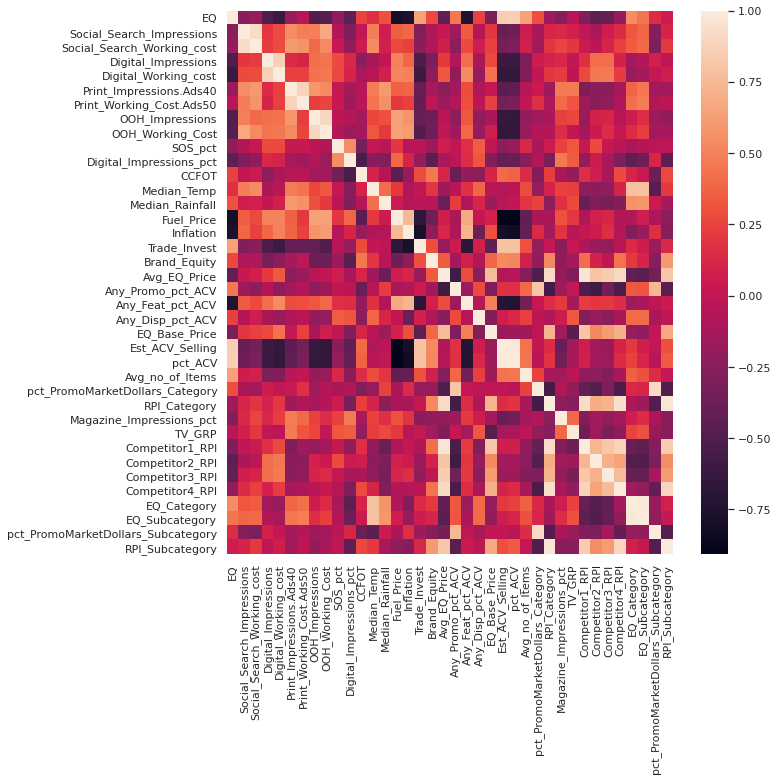

In [7]:
datam_short=datam

mat.figure(figsize=(10,10))
corre=datam_short.corr()
#corre=corre.abs()
ax = sns.heatmap(corre,xticklabels=True, yticklabels=True)
datam_short

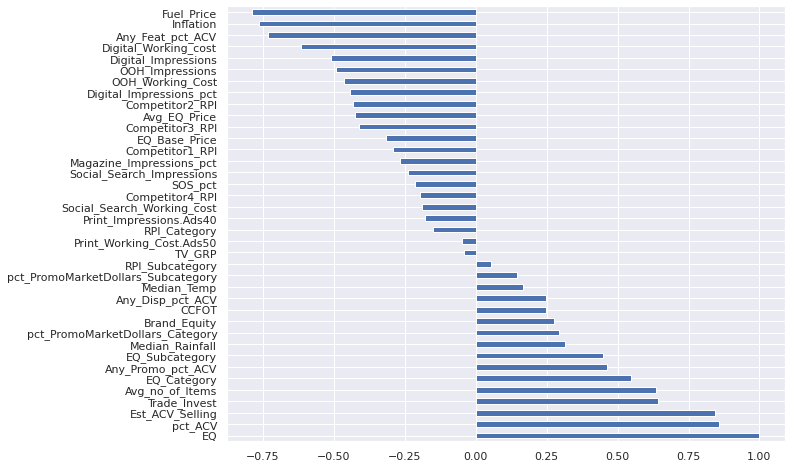

In [8]:
mat.figure(figsize=(10,8))
(corre
     .EQ
     .sort_values(ascending=False)
     .plot
     .barh())

In [0]:
dataq=datam_short
datasq=corre.EQ.sort_values(ascending=False)
important_drivers=["pct_ACV",#                               0.857306
"Est_ACV_Selling",#                       0.844173
"Trade_Invest",#                          0.641673
"Avg_no_of_Items",#                       0.636710
"EQ_Category",#                           0.547940
"Any_Promo_pct_ACV",#                     0.463025
"EQ_Subcategory",#                        0.447588
"Median_Rainfall",
"EQ_Base_Price",#                        -0.315342
"Competitor3_RPI",#                      -0.411542
"Avg_EQ_Price",#                         -0.424190
"Competitor2_RPI",#                      -0.432956
"Digital_Impressions_pct",#              -0.442399
"OOH_Working_Cost",#                     -0.464567
"OOH_Impressions",#                      -0.492861
"Digital_Impressions",#                  -0.509578
"Digital_Working_cost",#                 -0.614404
"Any_Feat_pct_ACV",#                     -0.733260
"Inflation",#                           -0.765153
"Fuel_Price"             
  ]
important_drivers
dropping_columns={"pct_PromoMarketDollars_Category",#       0.292553
"Brand_Equity",#                          0.275284
"CCFOT",#                                  0.247963
"Any_Disp_pct_ACV",#                       0.246106
"Median_Temp",#                            0.165922
"pct_PromoMarketDollars_Subcategory",#     0.143906
"RPI_Subcategory",#                        0.055342
"TV_GRP",#                                -0.040370
"Print_Working_Cost.Ads50",#              -0.049174
"RPI_Category",#                          -0.152428
"Print_Impressions.Ads40",#               -0.177558
"Social_Search_Working_cost",#            -0.188550
"Competitor4_RPI",#                       -0.195253
"SOS_pct",#                               -0.214566
"Social_Search_Impressions",#             -0.239020
"Magazine_Impressions_pct",#              -0.266168
"Competitor1_RPI"}

In [10]:
'''ssi= datam[['EQ','Social_Search_Impressions']].groupby('Social_Search_Impressions')
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=states.index, y=states['Social_Search_Impressions'], palette= sns.color_palette("muted"))
ax.set_ylabel("Social_Search_Impressions")
ax.set_xlabel("EQ")
for item in ax.get_xticklabels():
    item.set_rotation(90)
fig=plt.gcf()
fig.set_size_inches(18.5, 10.5)
'''


'ssi= datam[[\'EQ\',\'Social_Search_Impressions\']].groupby(\'Social_Search_Impressions\')\nplt.figure(figsize=(8, 5))\nax = sns.barplot(x=states.index, y=states[\'Social_Search_Impressions\'], palette= sns.color_palette("muted"))\nax.set_ylabel("Social_Search_Impressions")\nax.set_xlabel("EQ")\nfor item in ax.get_xticklabels():\n    item.set_rotation(90)\nfig=plt.gcf()\nfig.set_size_inches(18.5, 10.5)\n'

In [11]:
data_using=datam_short.drop(columns=dropping_columns)
data_using

,Period,EQ,Digital_Impressions,Digital_Working_cost,OOH_Impressions,OOH_Working_Cost,Digital_Impressions_pct,Median_Rainfall,Fuel_Price,Inflation,Trade_Invest,Avg_EQ_Price,Any_Promo_pct_ACV,Any_Feat_pct_ACV,EQ_Base_Price,Est_ACV_Selling,pct_ACV,Avg_no_of_Items,Competitor2_RPI,Competitor3_RPI,EQ_Category,EQ_Subcategory
0,2016 - Period:1,504.784933,37148.2,2045.282000,6.300988e+07,3.000829e+05,3.828396,0.5150,8.226,0.013258,42744.25684,49.091447,9.691794,1.633989,1.427532,8696587915,39.441025,2.611782,35.557371,44.502717,1728388.673,331927.5394
1,2016 - Period:2,490.226477,50886.8,2370.584000,6.300988e+07,3.000829e+05,3.828396,0.2700,7.473,0.009938,36290.43956,49.057612,9.415938,1.633989,1.442716,8682307085,38.417224,2.522814,37.223072,45.720077,1900859.879,334611.3806
2,2016 - Period:3,479.244686,253333.2,3180.888000,6.300988e+07,3.000829e+05,3.828396,0.3900,8.001,0.007832,34852.14166,49.367514,5.176684,1.633989,1.423408,8706897549,36.499442,2.477322,40.800563,41.822953,2036436.906,387148.3582
3,2016 - Period:4,489.057428,3426239.0,13595.398000,6.300988e+07,3.000829e+05,3.828396,0.3500,8.767,0.010034,24869.55899,50.657634,6.088273,1.633989,1.443401,8660288592,38.135159,2.520409,36.576140,41.578429,2113635.013,482489.6740
4,2016 - Period:5,477.031994,552197.8,3983.134000,6.300988e+07,3.000829e+05,3.828396,0.5025,9.277,0.009546,61675.32162,50.625777,7.827112,1.633989,1.473687,8644518558,38.629564,2.497285,36.032016,42.602412,2402211.102,629826.6484
5,2016 - Period:6,487.855299,29892.2,1800.344000,6.300988e+07,3.000829e+05,3.828396,0.4600,9.824,0.009290,40458.59237,51.268984,9.791997,1.633989,1.457055,8627353001,39.097729,2.455277,36.996437,44.943022,2796949.720,806075.7642
6,2016 - Period:7,466.399281,6021768.0,7591.644000,6.300988e+07,3.000829e+05,3.828396,0.4250,9.642,0.008284,40945.74781,50.676333,8.802657,3.385373,1.437953,8662698543,39.017768,2.412757,37.314308,43.358409,2867306.933,828776.1488
7,2016 - Period:8,546.053084,1815307.2,7866.572000,6.300988e+07,3.000829e+05,3.828396,0.5550,9.148,0.008461,22026.52625,48.992972,13.660056,5.136756,1.453832,8511934271,37.940027,2.641764,34.013304,41.356740,2813494.081,789109.5698
8,2016 - Period:9,464.925607,153633.2,3579.130000,6.300988e+07,3.000829e+05,3.828396,0.5600,9.225,0.011022,53214.88476,49.308852,9.791260,5.154291,1.476185,7928216512,35.696189,2.559809,37.377758,40.577016,2441916.655,606656.5082
9,2016 - Period:10,357.648693,30331.0,23205.988710,6.300988e+07,3.000829e+05,3.828396,0.2950,9.331,0.013966,25343.21025,54.138214,6.060160,5.356933,1.525389,7765786227,32.618780,2.664421,46.598751,44.631443,2017353.844,421134.3688


In [0]:
dataq=data_using

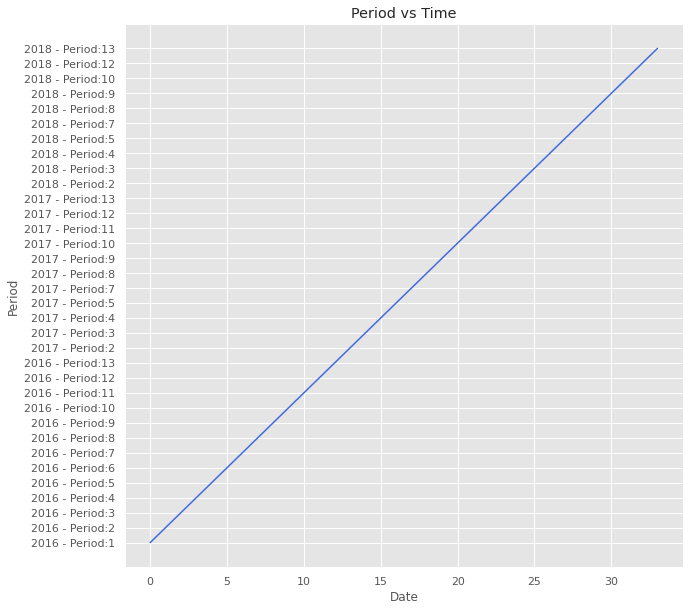

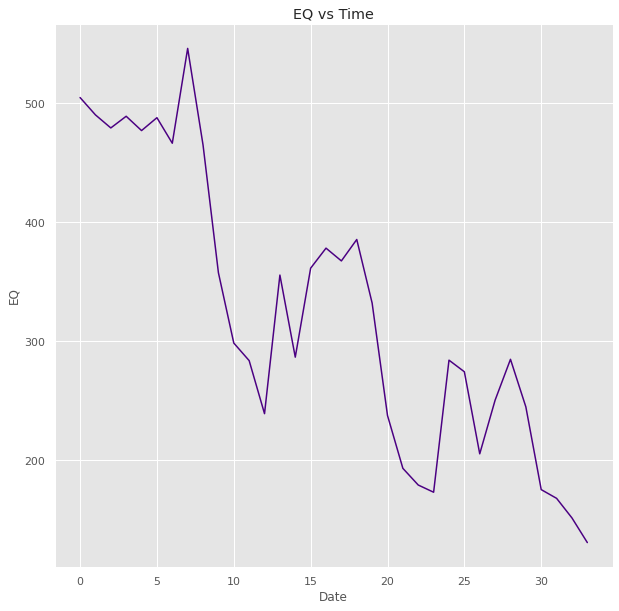

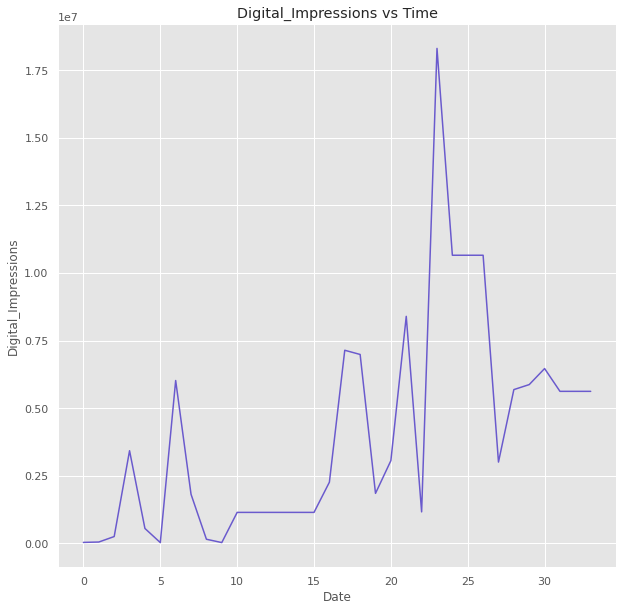

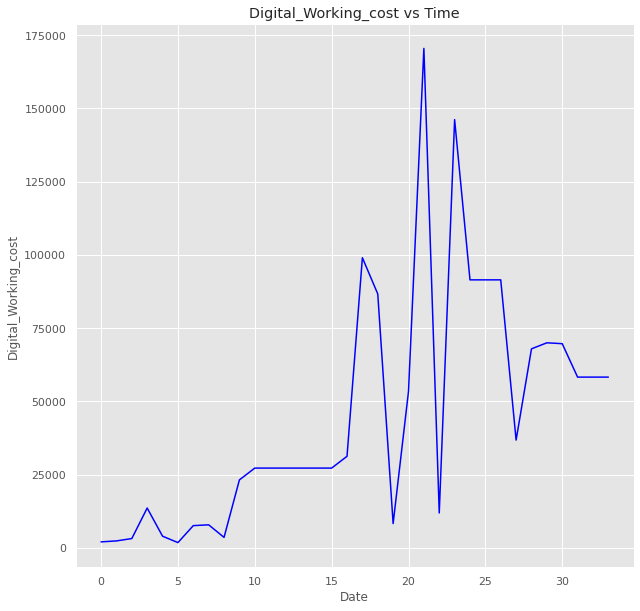

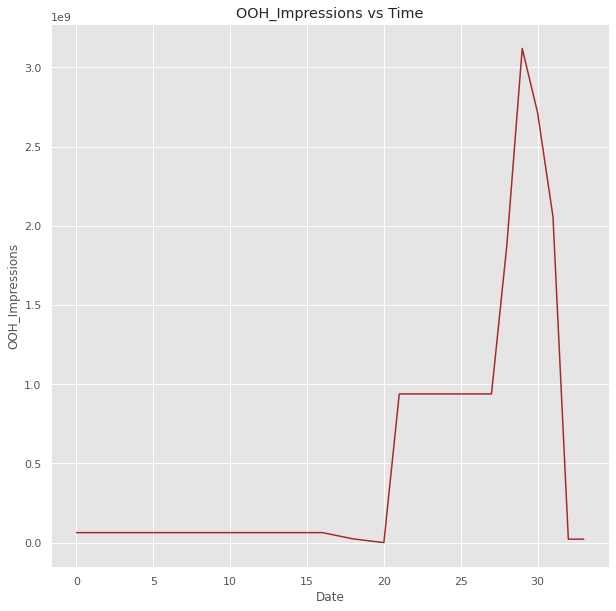

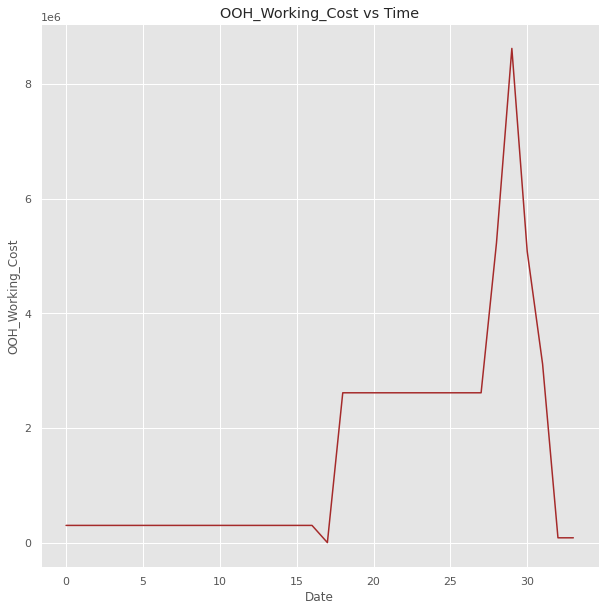

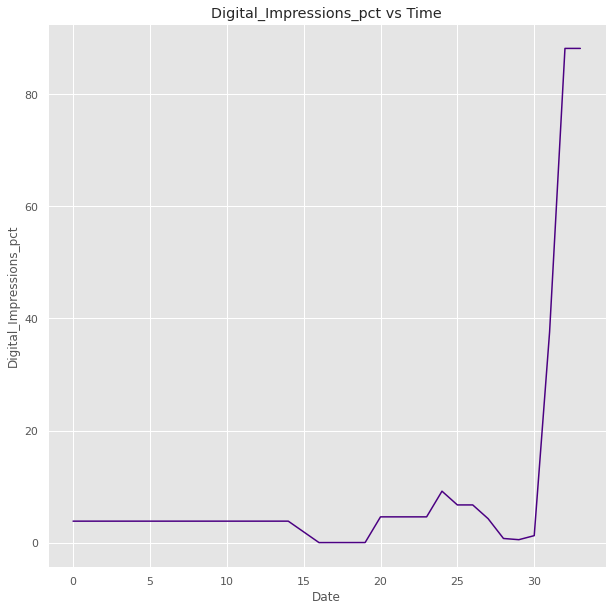

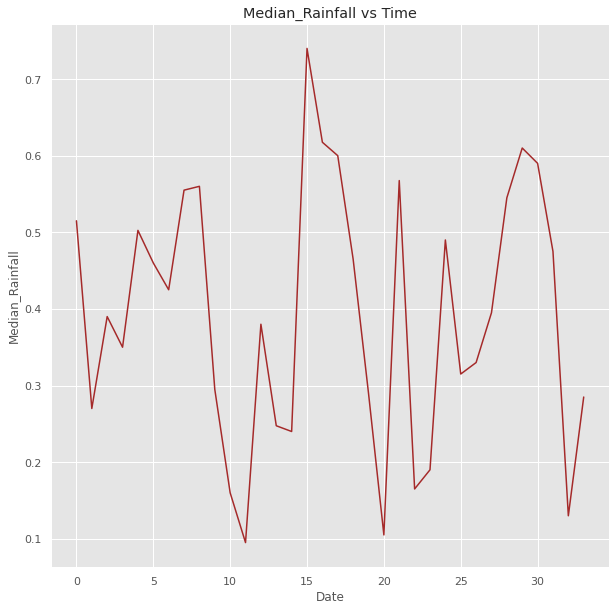

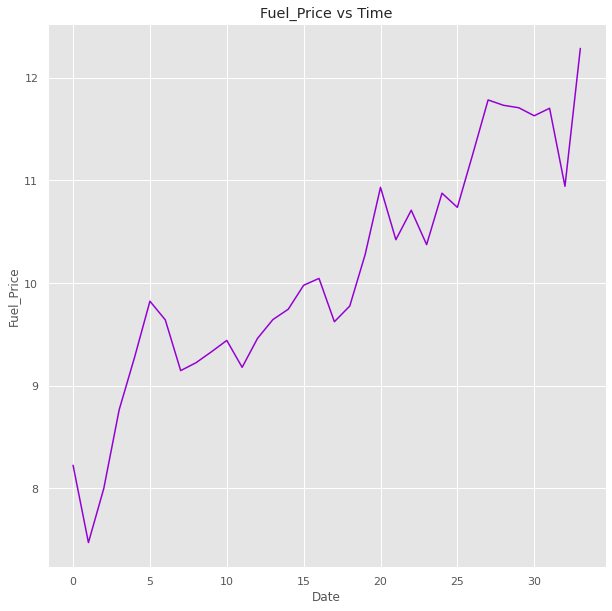

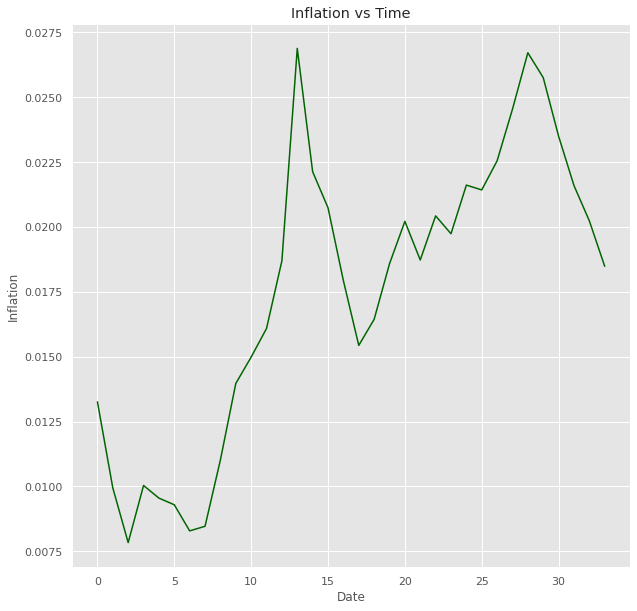

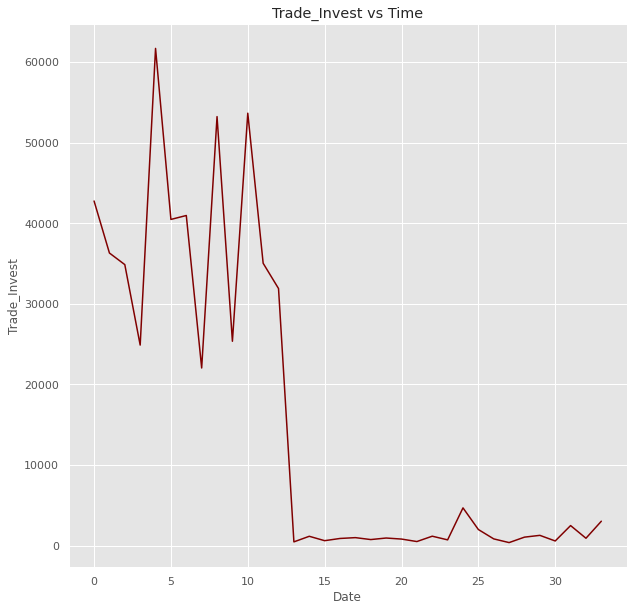

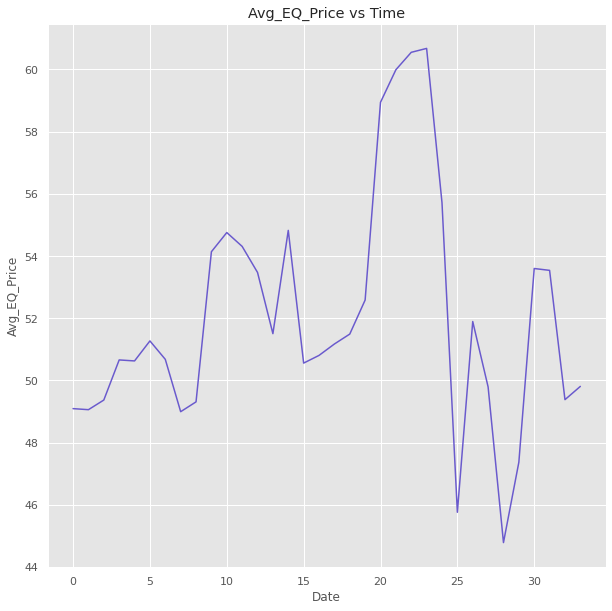

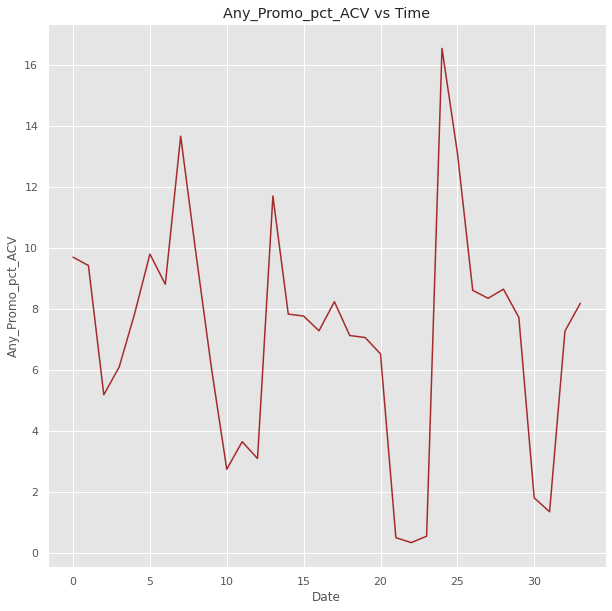

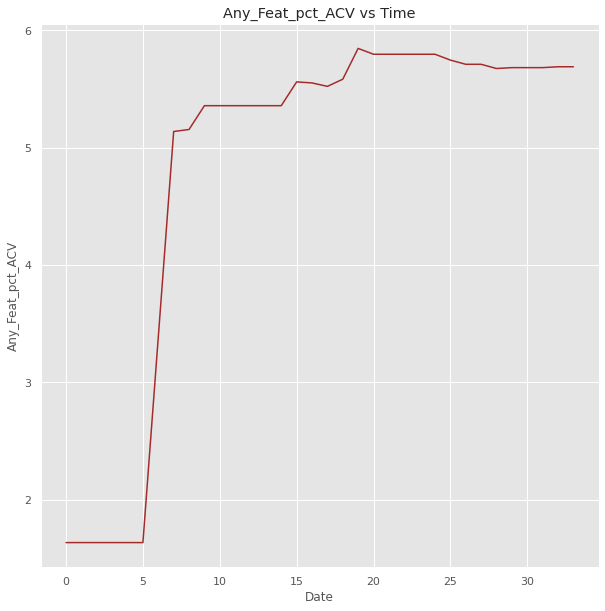

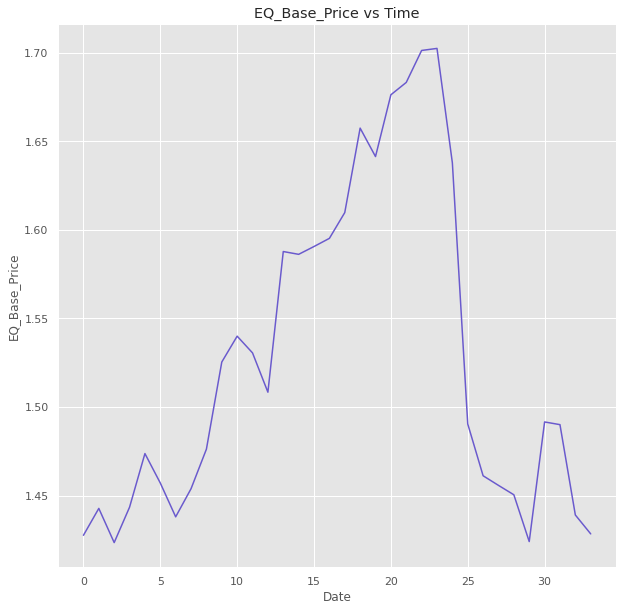

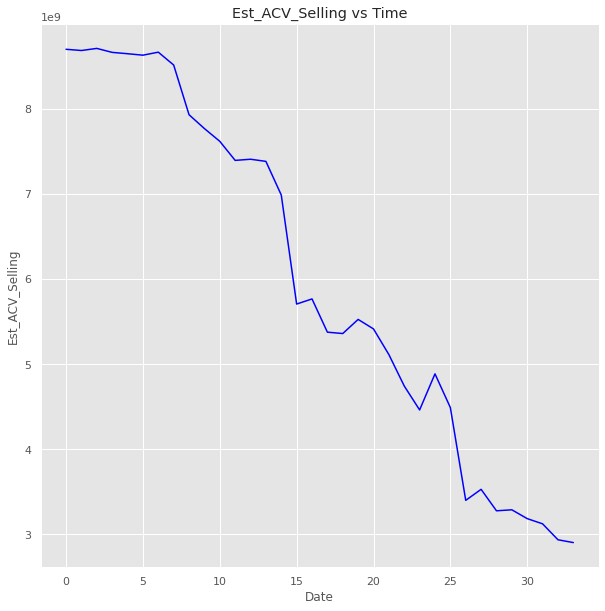

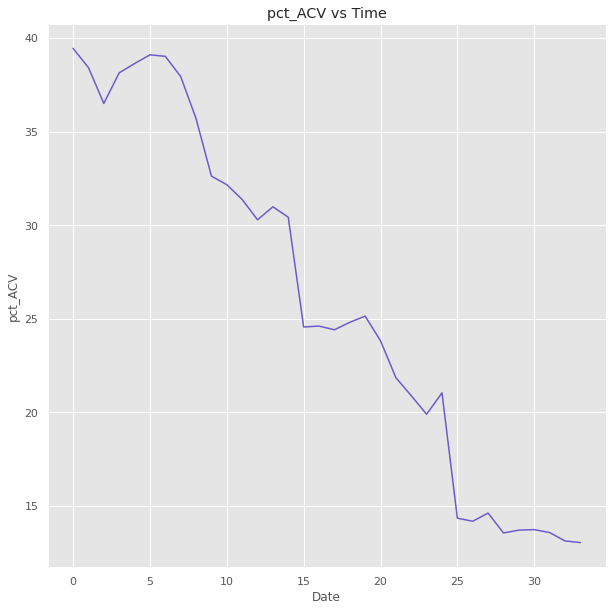

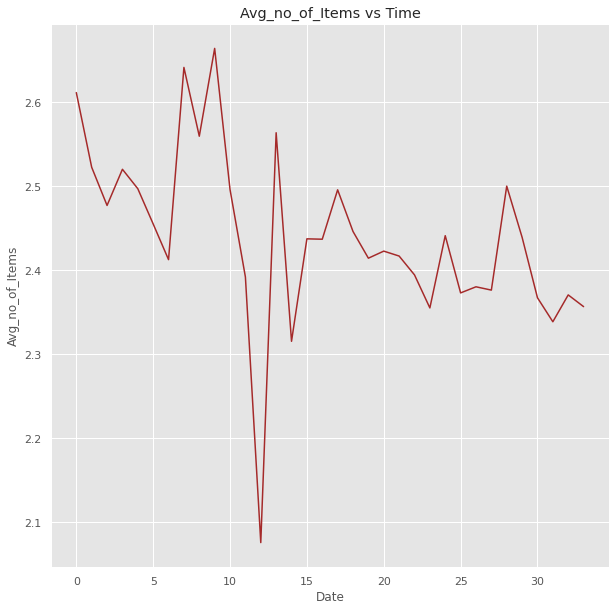

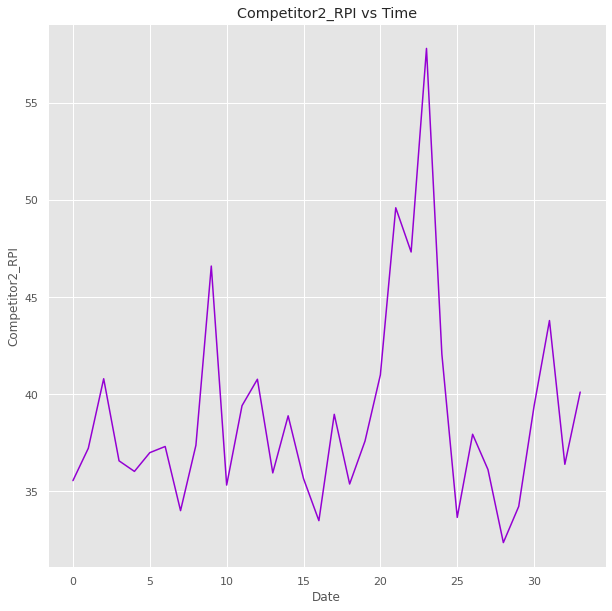

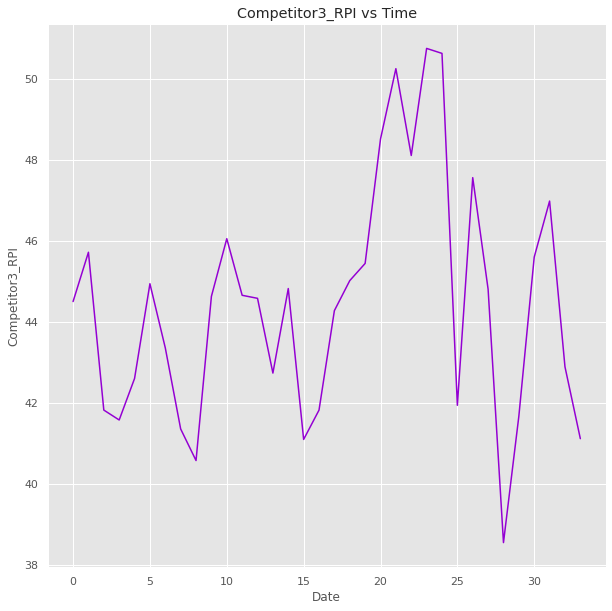

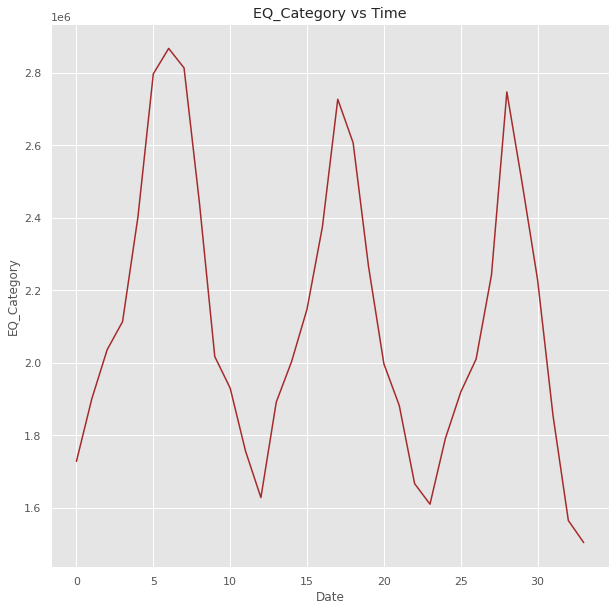

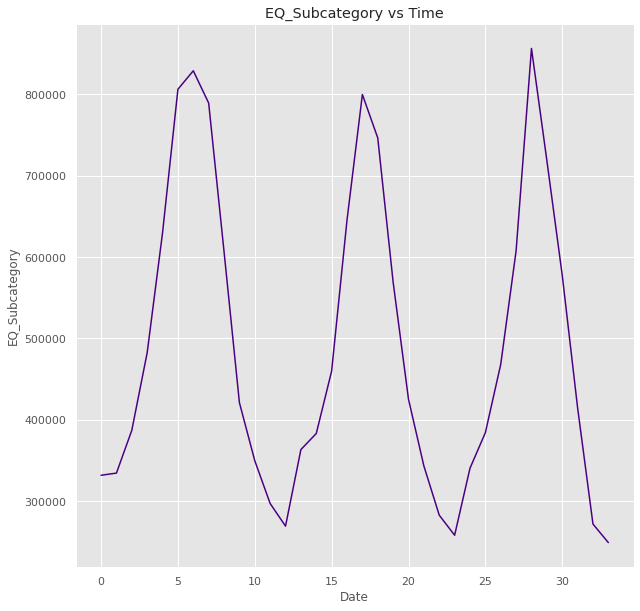

In [13]:
set_of_colors=['blue','darkgreen','brown','royalblue','maroon','darkviolet','slateblue','indigo']
datam=dataq
for cols in datam:
  mat.style.use('ggplot')
  mat.figure(figsize=(10,10))

  mat.plot(datam.index,datam[cols],color=random.choice(set_of_colors))
  mat.xlabel('Date') 
  mat.ylabel(cols)
  mat.title(cols+' vs Time')
  mat.show()


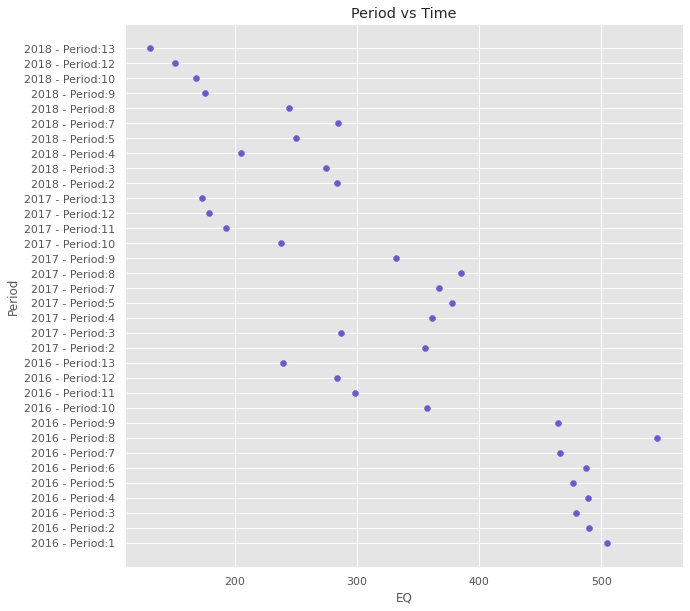

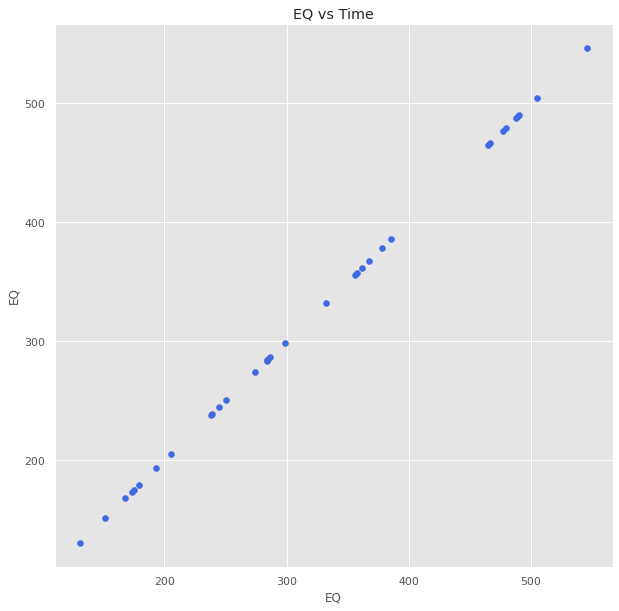

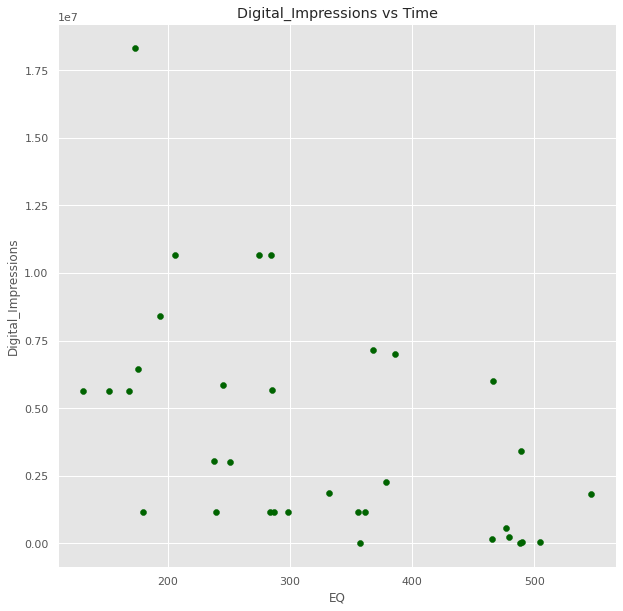

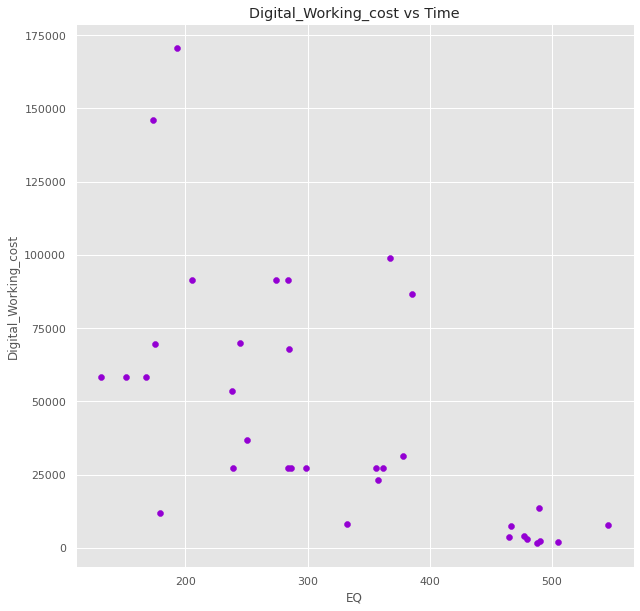

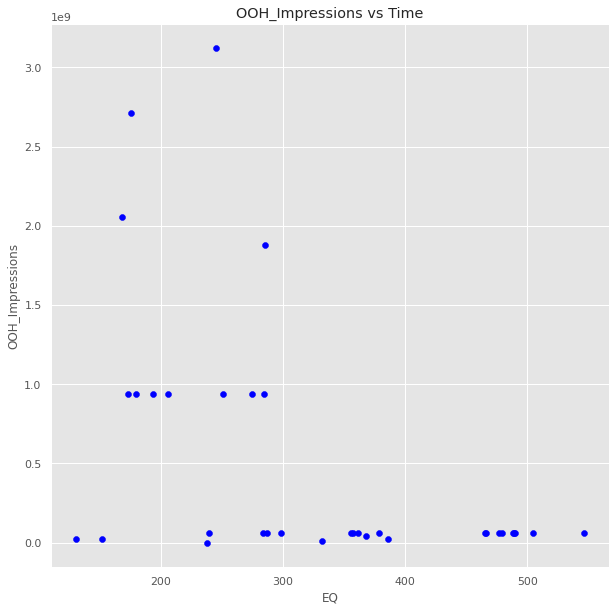

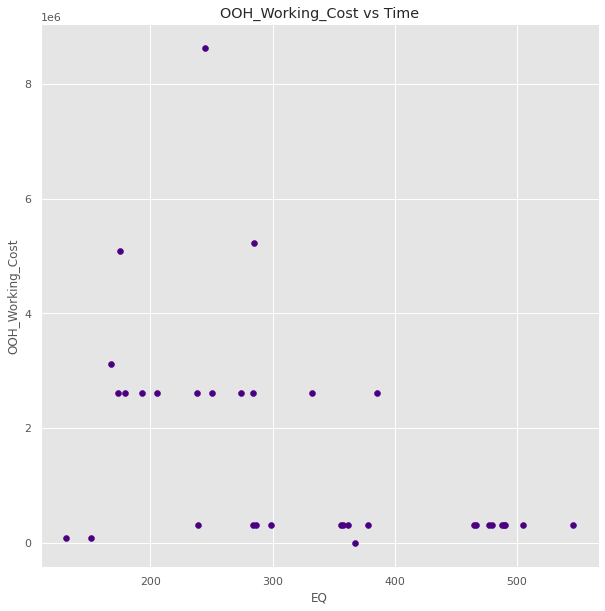

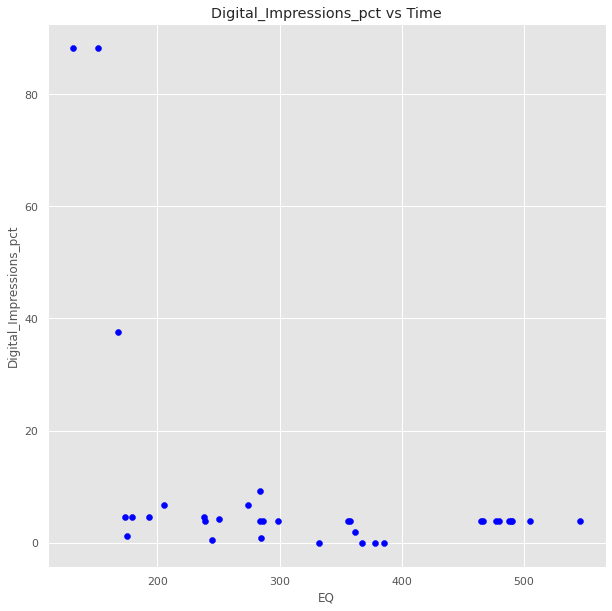

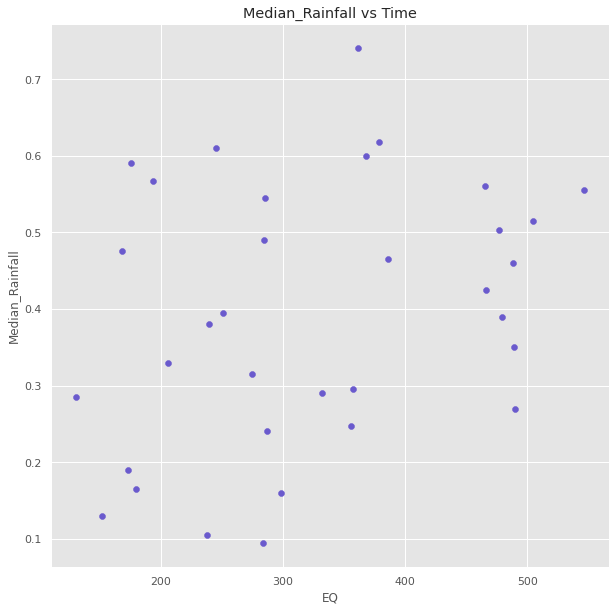

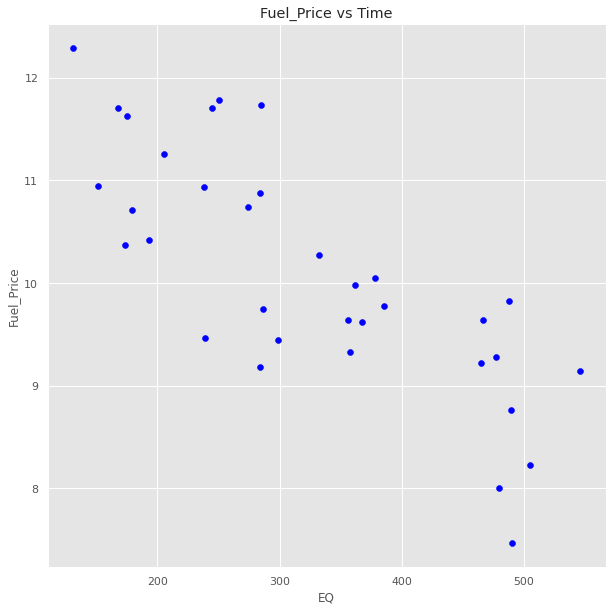

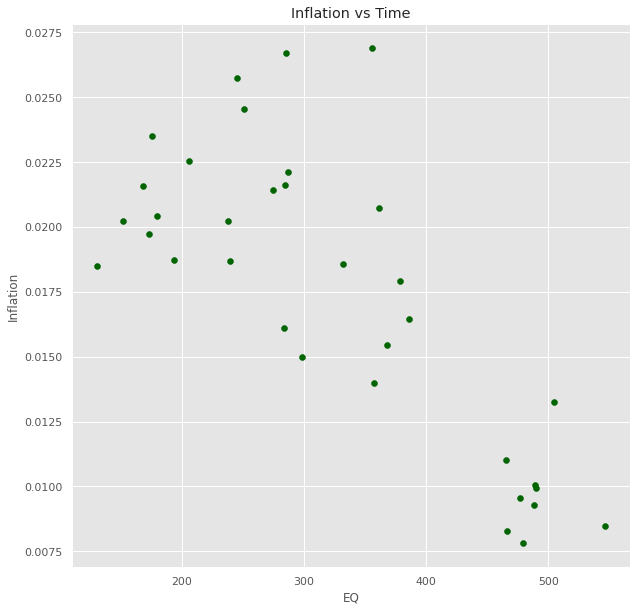

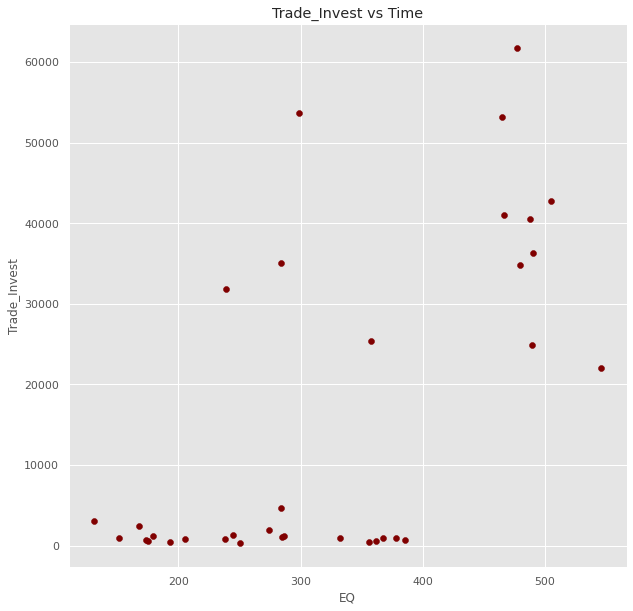

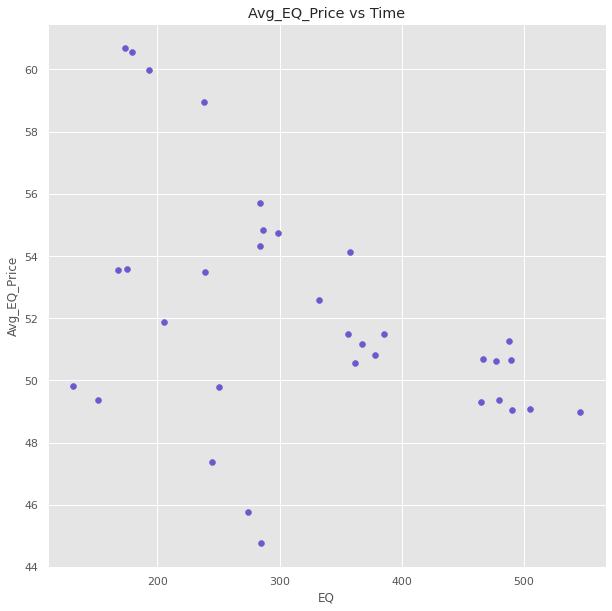

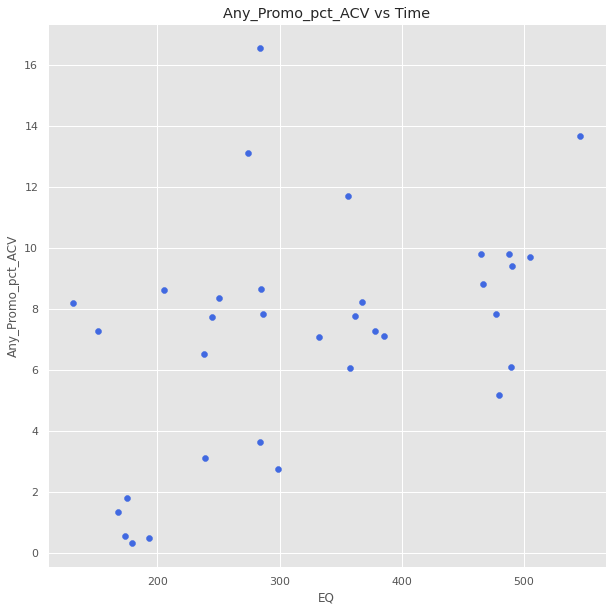

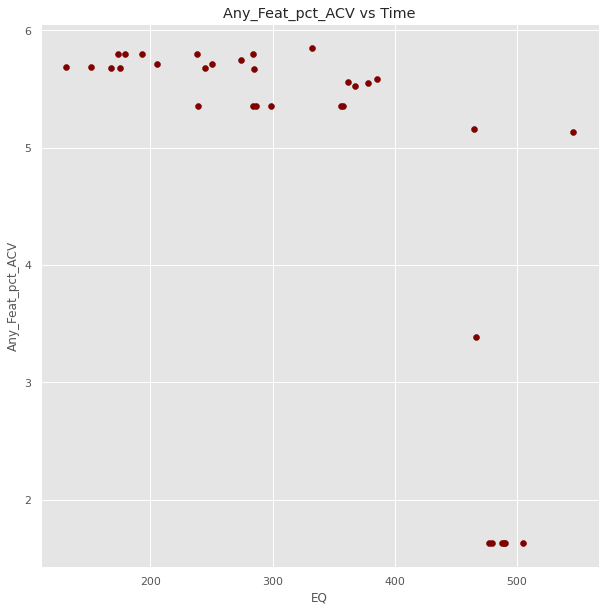

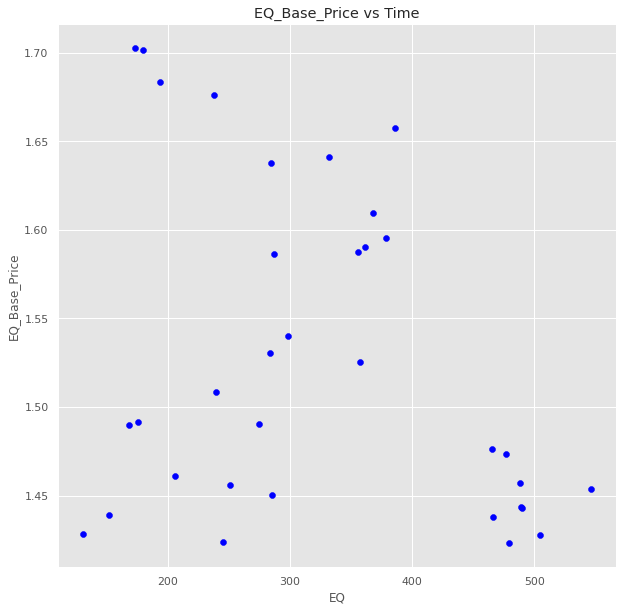

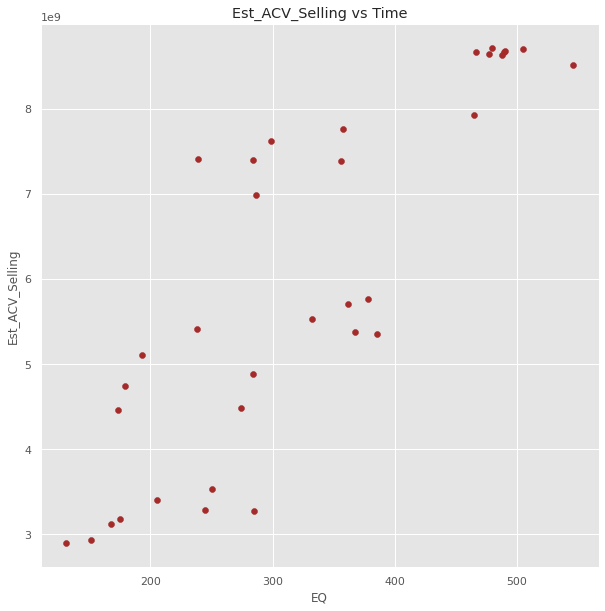

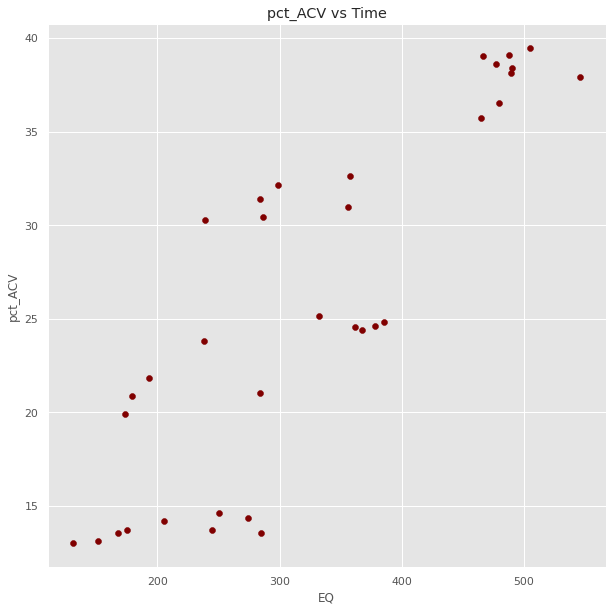

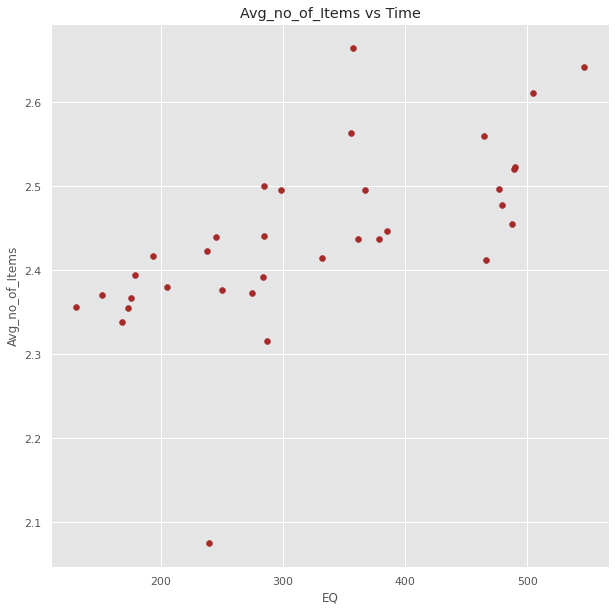

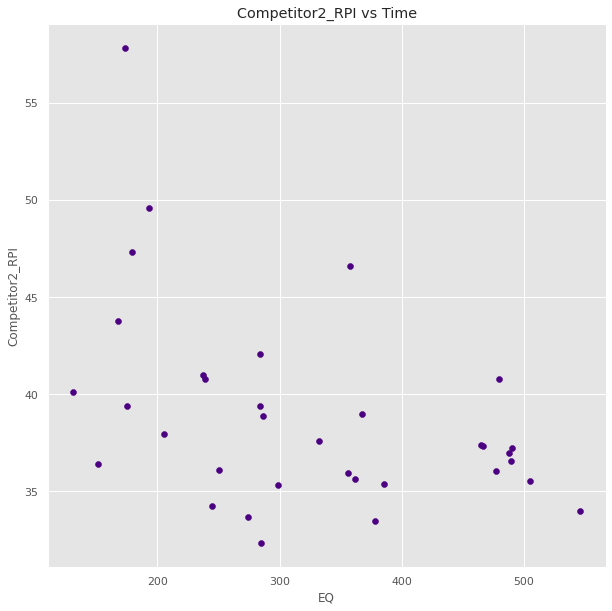

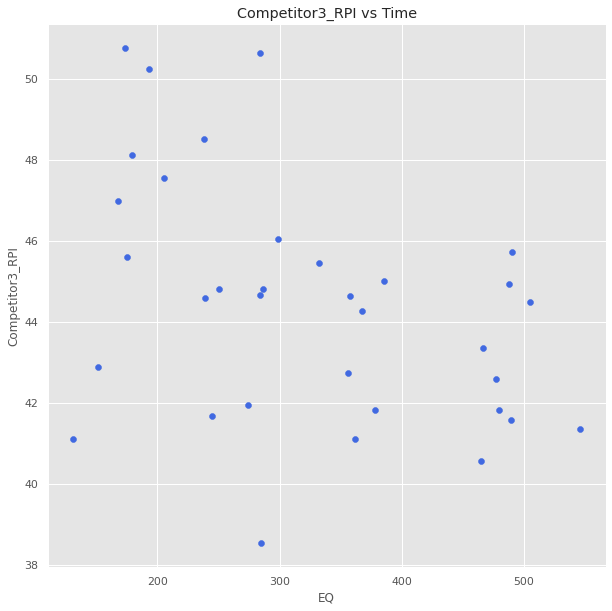

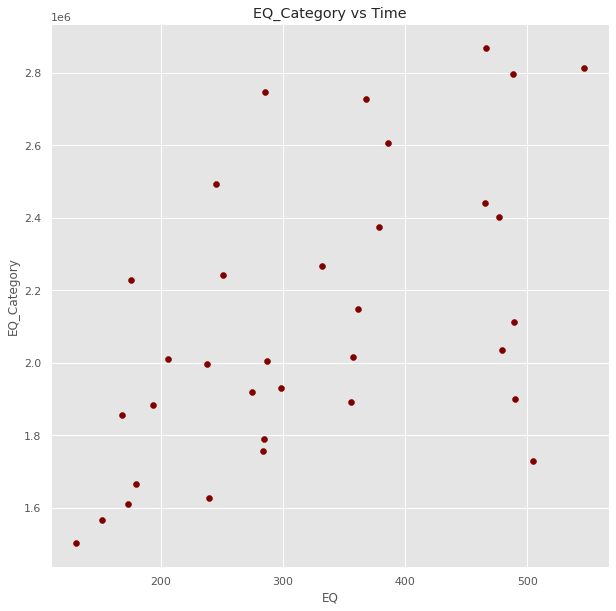

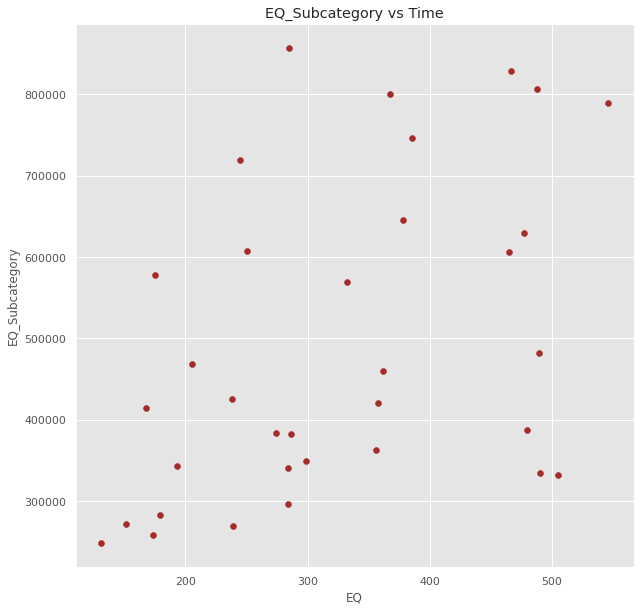

In [14]:
set_of_colors=['blue','darkgreen','brown','royalblue','maroon','darkviolet','slateblue','indigo']
datam=dataq
for cols in datam:
  mat.style.use('ggplot')
  mat.figure(figsize=(10,10))

  mat.scatter(datam['EQ'],datam[cols],color=random.choice(set_of_colors))
  mat.xlabel('EQ') 
  mat.ylabel(cols)
  mat.title(cols+' vs Time')
  mat.show()


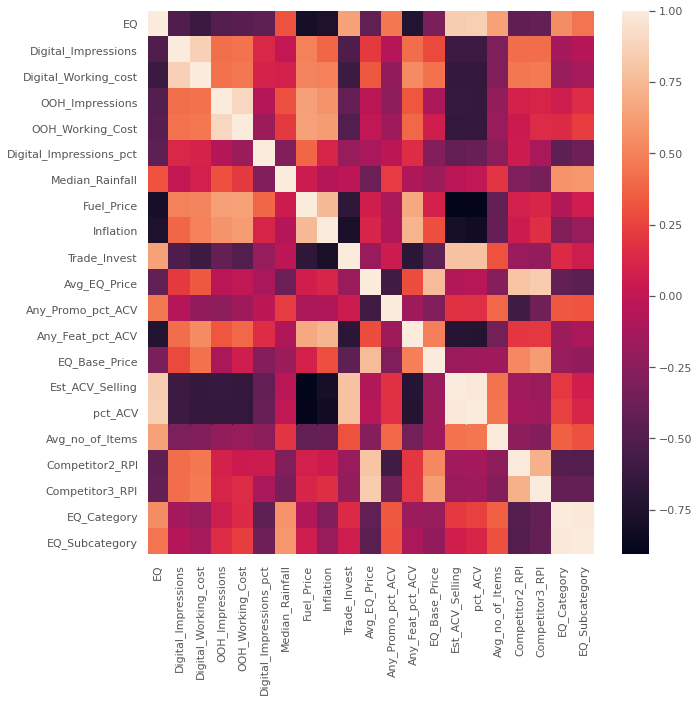

In [15]:
datam.set_index(datam.Period,inplace=True)
datam.drop(columns='Period',inplace=True)

#dataq=dataq[dataq['Day']<700]
mat.figure(figsize=(10,10))
corre=datam.corr()
#corre=corre.abs()
ax = sns.heatmap(corre,xticklabels=True, yticklabels=True)

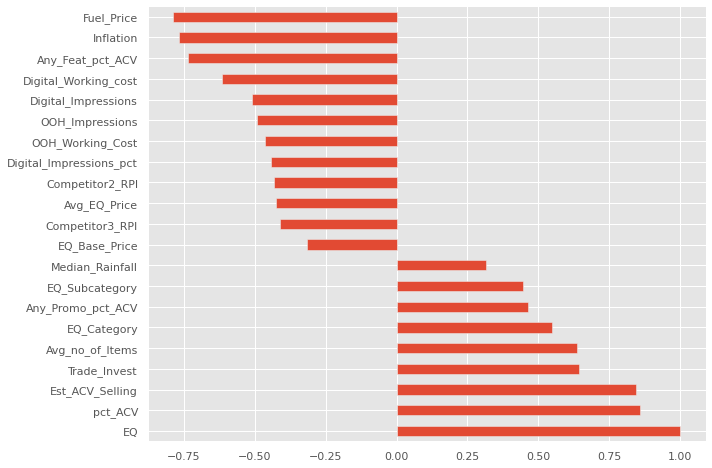

In [16]:
mat.figure(figsize=(10,8))
(corre
     .EQ
     .sort_values(ascending=False)
     .plot
     .barh())

In [0]:
#defing the function
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")    

In [18]:
from statsmodels.tsa.stattools import adfuller

for name, column in datam.iteritems() :
  adfuller_test(column, name=column.name)
  print('\n')

    Augmented Dickey-Fuller Test on "EQ" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.0958
 No. Lags Chosen       = 10
 Critical value 1%     = -3.753
 Critical value 5%     = -2.998
 Critical value 10%    = -2.639
 => P-Value = 0.2462. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Digital_Impressions" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.1319
 No. Lags Chosen       = 1
 Critical value 1%     = -3.654
 Critical value 5%     = -2.957
 Critical value 10%    = -2.618
 => P-Value = 0.2319. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Digital_Working_cost" 
    -----------------------------------------------
 Nul

In [19]:
datam

,EQ,Digital_Impressions,Digital_Working_cost,OOH_Impressions,OOH_Working_Cost,Digital_Impressions_pct,Median_Rainfall,Fuel_Price,Inflation,Trade_Invest,Avg_EQ_Price,Any_Promo_pct_ACV,Any_Feat_pct_ACV,EQ_Base_Price,Est_ACV_Selling,pct_ACV,Avg_no_of_Items,Competitor2_RPI,Competitor3_RPI,EQ_Category,EQ_Subcategory
Period,,,,,,,,,,,,,,,,,,,,,
2016 - Period:1,504.784933,37148.2,2045.282000,6.300988e+07,3.000829e+05,3.828396,0.5150,8.226,0.013258,42744.25684,49.091447,9.691794,1.633989,1.427532,8696587915,39.441025,2.611782,35.557371,44.502717,1728388.673,331927.5394
2016 - Period:2,490.226477,50886.8,2370.584000,6.300988e+07,3.000829e+05,3.828396,0.2700,7.473,0.009938,36290.43956,49.057612,9.415938,1.633989,1.442716,8682307085,38.417224,2.522814,37.223072,45.720077,1900859.879,334611.3806
2016 - Period:3,479.244686,253333.2,3180.888000,6.300988e+07,3.000829e+05,3.828396,0.3900,8.001,0.007832,34852.14166,49.367514,5.176684,1.633989,1.423408,8706897549,36.499442,2.477322,40.800563,41.822953,2036436.906,387148.3582
2016 - Period:4,489.057428,3426239.0,13595.398000,6.300988e+07,3.000829e+05,3.828396,0.3500,8.767,0.010034,24869.55899,50.657634,6.088273,1.633989,1.443401,8660288592,38.135159,2.520409,36.576140,41.578429,2113635.013,482489.6740
2016 - Period:5,477.031994,552197.8,3983.134000,6.300988e+07,3.000829e+05,3.828396,0.5025,9.277,0.009546,61675.32162,50.625777,7.827112,1.633989,1.473687,8644518558,38.629564,2.497285,36.032016,42.602412,2402211.102,629826.6484
2016 - Period:6,487.855299,29892.2,1800.344000,6.300988e+07,3.000829e+05,3.828396,0.4600,9.824,0.009290,40458.59237,51.268984,9.791997,1.633989,1.457055,8627353001,39.097729,2.455277,36.996437,44.943022,2796949.720,806075.7642
2016 - Period:7,466.399281,6021768.0,7591.644000,6.300988e+07,3.000829e+05,3.828396,0.4250,9.642,0.008284,40945.74781,50.676333,8.802657,3.385373,1.437953,8662698543,39.017768,2.412757,37.314308,43.358409,2867306.933,828776.1488
2016 - Period:8,546.053084,1815307.2,7866.572000,6.300988e+07,3.000829e+05,3.828396,0.5550,9.148,0.008461,22026.52625,48.992972,13.660056,5.136756,1.453832,8511934271,37.940027,2.641764,34.013304,41.356740,2813494.081,789109.5698
2016 - Period:9,464.925607,153633.2,3579.130000,6.300988e+07,3.000829e+05,3.828396,0.5600,9.225,0.011022,53214.88476,49.308852,9.791260,5.154291,1.476185,7928216512,35.696189,2.559809,37.377758,40.577016,2441916.655,606656.5082


In [0]:
df_differenced=datam

df_differenced.drop(columns={'OOH_Impressions','Any_Feat_pct_ACV','OOH_Working_Cost','Digital_Impressions_pct','Trade_Invest'},inplace=True)

In [0]:
datam=df_differenced
df_differenced = df_differenced.diff()
df_differenced.dropna(inplace=True)

In [22]:
from statsmodels.tsa.stattools import adfuller

for name, column in df_differenced.iteritems() :
  adfuller_test(column, name=column.name)
  print('\n')

    Augmented Dickey-Fuller Test on "EQ" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.0907
 No. Lags Chosen       = 8
 Critical value 1%     = -3.738
 Critical value 5%     = -2.992
 Critical value 10%    = -2.636
 => P-Value = 0.0273. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Digital_Impressions" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -9.985
 No. Lags Chosen       = 0
 Critical value 1%     = -3.654
 Critical value 5%     = -2.957
 Critical value 10%    = -2.618
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Digital_Working_cost" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.

In [23]:
df_differenced

,EQ,Digital_Impressions,Digital_Working_cost,Median_Rainfall,Fuel_Price,Inflation,Avg_EQ_Price,Any_Promo_pct_ACV,EQ_Base_Price,Est_ACV_Selling,pct_ACV,Avg_no_of_Items,Competitor2_RPI,Competitor3_RPI,EQ_Category,EQ_Subcategory
Period,,,,,,,,,,,,,,,,
2016 - Period:2,-14.558456,13738.6,325.302000,-0.2450,-0.753,-0.003320,-0.033835,-0.275856,0.015184,-1.428083e+07,-1.023800,-0.088968,1.665701,1.217360,172471.206,2683.8412
2016 - Period:3,-10.981792,202446.4,810.304000,0.1200,0.528,-0.002106,0.309902,-4.239254,-0.019308,2.459046e+07,-1.917782,-0.045491,3.577491,-3.897124,135577.027,52536.9776
2016 - Period:4,9.812742,3172905.8,10414.510000,-0.0400,0.766,0.002202,1.290120,0.911590,0.019993,-4.660896e+07,1.635716,0.043087,-4.224423,-0.244525,77198.107,95341.3158
2016 - Period:5,-12.025434,-2874041.2,-9612.264000,0.1525,0.510,-0.000488,-0.031857,1.738839,0.030286,-1.577003e+07,0.494405,-0.023124,-0.544123,1.023983,288576.089,147336.9744
2016 - Period:6,10.823306,-522305.6,-2182.790000,-0.0425,0.547,-0.000256,0.643207,1.964884,-0.016632,-1.716556e+07,0.468165,-0.042008,0.964421,2.340610,394738.618,176249.1158
2016 - Period:7,-21.456018,5991875.8,5791.300000,-0.0350,-0.182,-0.001006,-0.592651,-0.989340,-0.019102,3.534554e+07,-0.079961,-0.042520,0.317871,-1.584613,70357.213,22700.3846
2016 - Period:8,79.653803,-4206460.8,274.928000,0.1300,-0.494,0.000177,-1.683362,4.857399,0.015879,-1.507643e+08,-1.077741,0.229007,-3.301004,-2.001669,-53812.852,-39666.5790
2016 - Period:9,-81.127478,-1661674.0,-4287.442000,0.0050,0.077,0.002560,0.315880,-3.868796,0.022352,-5.837178e+08,-2.243838,-0.081955,3.364454,-0.779724,-371577.426,-182453.0616
2016 - Period:10,-107.276913,-123302.2,19626.858710,-0.2650,0.106,0.002944,4.829362,-3.731099,0.049205,-1.624303e+08,-3.077409,0.104612,9.220993,4.054428,-424562.811,-185522.1394


In [24]:
from statsmodels.tsa.api import VAR
model = VAR(df_differenced)
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  79.710569003428
BIC :  92.16932417722569
FPE :  2.887561287616033e+35
HQIC:  83.84029386491942 

Lag Order = 2
AIC :  -505.216498576701
BIC :  -480.7924584486959
FPE :  7.509841503347684e-211
HQIC:  -497.2548704999889 

Lag Order = 3
AIC :  -537.2303777807098
BIC :  -500.61241953993874
FPE :  7.703043380270144e-247
HQIC:  -525.5159783200424 

Lag Order = 4
AIC :  -569.4586654435354
BIC :  -520.4246080922964
FPE :  1.6108394181076767e-272
HQIC:  -554.101810420797 

Lag Order = 5
AIC :  -584.3708415733362
BIC :  -522.7088042452267
FPE :  1.0425996204884056e-289
HQIC:  -565.5201420281952 

Lag Order = 6
AIC :  -716.819993713131
BIC :  -642.3333708968821
FPE :  0.0
HQIC:  -694.6712159002403 

Lag Order = 7
AIC :  -702.3682072681786
BIC :  -614.8821095473002
FPE :  0.0
HQIC:  -677.1753766079096 

Lag Order = 8
AIC :  -698.3788449659271
BIC :  -597.7484568648085
FPE :  0.0
HQIC:  -670.4682520834565 

Lag Order = 9
AIC :  -674.8414964878834
BIC :  -560.9629595542486
FPE :

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [25]:
model_fitted = model.fit(6)
model_fitted.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/vector_ar/var_model.py:1431: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self._cov_params()))
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 01, Apr, 2020
Time:                     17:14:17
--------------------------------------------------------------------
No. of Equations:         16.0000    BIC:                   -642.333
Nobs:                     27.0000    HQIC:                  -694.671
Log likelihood:           10616.1    FPE:                    0.00000
AIC:                     -716.820    Det(Omega_mle):         0.00000
--------------------------------------------------------------------
Results for equation EQ
                             coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------------
const                           0.000000              NAN              NAN             NAN
L1.EQ                          -0.000006         0.000001           -4.252           0.000
L1.Digital_Impressions 

In [26]:
def adjust(val, length= 6): return str(val).ljust(length)

from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(dataq.columns, out):
    print(adjust(col), ':', round(val, 2))

EQ     : 1.57
Digital_Impressions : 1.55
Digital_Working_cost : 1.45
Median_Rainfall : 1.44
Fuel_Price : 1.6
Inflation : 1.68
Avg_EQ_Price : 1.16
Any_Promo_pct_ACV : 1.67
EQ_Base_Price : 1.61
Est_ACV_Selling : 1.85
pct_ACV : 1.87
Avg_no_of_Items : 1.5
Competitor2_RPI : 1.63
Competitor3_RPI : 1.79
EQ_Category : 1.49
EQ_Subcategory : 1.51


In [27]:
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = df_differenced.values[-lag_order:]
forecast_input

6


array([[ 3.43404157e+01,  2.67966440e+06,  3.11485462e+04,
         1.50000000e-01, -5.20000000e-02,  2.17462366e-03,
        -5.00752574e+00,  2.99140512e-01, -5.30862500e-03,
        -2.52004187e+08, -1.06080032e+00,  1.23880290e-01,
        -3.75652009e+00, -6.25645188e+00,  5.04834270e+05,
         2.48619405e+05],
       [-3.99641208e+01,  1.85316000e+05,  2.06428487e+03,
         6.50000000e-02, -2.40000000e-02, -9.57849460e-04,
         2.58452997e+00, -9.27859516e-01, -2.64278280e-02,
         1.15984630e+07,  1.50993990e-01, -6.09377540e-02,
         1.86176072e+00,  3.12070517e+00, -2.52641587e+05,
        -1.37590727e+05],
       [-6.94990403e+01,  5.92465400e+05, -2.99022860e+02,
        -2.00000000e-02, -7.80000000e-02, -2.25870968e-03,
         6.23131518e+00, -5.91945982e+00,  6.75608730e-02,
        -1.03545984e+08,  2.69711700e-02, -7.20691810e-02,
         5.17043082e+00,  3.92905851e+00, -2.65471798e+05,
        -1.40814157e+05],
       [-7.32565350e+00, -8.42372200e

In [28]:
fc = model_fitted.forecast(y=forecast_input, steps=7)
df_forecast = pd.DataFrame(fc, columns=df_differenced.columns + '_forcasted')
df_forecast

,EQ_forcasted,Digital_Impressions_forcasted,Digital_Working_cost_forcasted,Median_Rainfall_forcasted,Fuel_Price_forcasted,Inflation_forcasted,Avg_EQ_Price_forcasted,Any_Promo_pct_ACV_forcasted,EQ_Base_Price_forcasted,Est_ACV_Selling_forcasted,pct_ACV_forcasted,Avg_no_of_Items_forcasted,Competitor2_RPI_forcasted,Competitor3_RPI_forcasted,EQ_Category_forcasted,EQ_Subcategory_forcasted
0,-55.798988,3.723332e+06,-19044.833070,-0.732607,-0.083597,0.004378,8.472933,6.276506,0.082687,8.716876e+08,4.574037,0.125509,2.783166,4.737785,-29914.593531,-36816.639435
1,68.169125,5.383154e+06,72462.157954,0.661260,-0.174563,-0.003590,-6.903162,1.841107,-0.172654,-9.797798e+08,-5.479616,0.067302,-3.129158,-1.444187,197207.222187,42115.457408
2,13.135541,1.183240e+06,-14048.639535,0.085968,-0.345610,-0.006308,-2.008309,-6.605500,-0.097708,3.717373e+08,1.217108,-0.498023,-4.108822,1.563116,91290.400499,152664.098149
3,225.641945,-7.730605e+06,-105618.319338,0.059823,-0.176358,0.002360,-18.690473,13.271716,-0.210284,-2.430308e+08,-0.704269,0.450216,-12.192651,-12.387005,644847.532075,351218.576765
4,-32.043376,3.955444e+06,39174.802359,-0.537867,0.791924,-0.000784,4.173035,1.692139,0.001891,1.093266e+09,7.323439,-0.167679,-4.126724,0.194210,412821.128062,215064.767585
5,59.031409,-6.581432e+06,-15017.070113,0.671564,0.582061,0.003990,-0.459869,5.129842,-0.014730,3.702342e+08,1.638330,0.469837,6.804402,-1.492299,253276.993282,-2946.142077
6,-153.220089,-6.890820e+06,-125310.089573,-0.684422,0.547691,-0.000858,10.584034,-11.569404,0.011275,3.650529e+08,-1.003551,-0.211013,-5.772020,2.664930,-490943.879431,-231537.953641


In [0]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
          pass
           # df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_forcasted'].cumsum()
    return df_fc
df_results = invert_transformation(datam, df_forecast, second_diff=False)

In [30]:
df_results['EQ_forecast']

0     75.138373
1    143.307498
2    156.443039
3    382.084984
4    350.041608
5    409.073017
6    255.852928
Name: EQ_forecast, dtype: float64